In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans

In [2]:
pemsd=np.load('pems-bay/dataset.npy')
print(pemsd.shape)
count=np.unique(pemsd[:,:,0],return_counts=False)
print(count)
count=np.unique(pemsd[:,:,1],return_counts=False)
print(len(count))
unique,count=np.unique(pemsd[:,:,1],return_counts=True)
data_count=dict(zip(unique,count))
print(data_count)

(52116, 325, 2)
[ 5.   5.1  5.2 ... 84.4 84.8 85.1]
288
{0.0: 58825, 0.003472222222222222: 58825, 0.006944444444444444: 58825, 0.010416666666666666: 58825, 0.013888888888888888: 58825, 0.017361111111111112: 58825, 0.020833333333333332: 58825, 0.024305555555555556: 58825, 0.027777777777777776: 58825, 0.03125: 58825, 0.034722222222222224: 58825, 0.03819444444444445: 58825, 0.041666666666666664: 58825, 0.04513888888888889: 58825, 0.04861111111111111: 58825, 0.052083333333333336: 58825, 0.05555555555555555: 58825, 0.059027777777777776: 58825, 0.0625: 58825, 0.06597222222222222: 58825, 0.06944444444444445: 58825, 0.07291666666666667: 58825, 0.0763888888888889: 58825, 0.0798611111111111: 58825, 0.08333333333333333: 58825, 0.08680555555555555: 58825, 0.09027777777777778: 58825, 0.09375: 58825, 0.09722222222222222: 58825, 0.10069444444444445: 58825, 0.10416666666666667: 58825, 0.1076388888888889: 58825, 0.1111111111111111: 58825, 0.11458333333333333: 58825, 0.11805555555555555: 58825, 0.121527

In [4]:
# sz = np.load('shenzhen/matrix.npy')
# sz.shape
pems = np.load('pems-bay/matrix.npy')
# print(pems.shape)
# unique,count=np.unique(pems,return_counts=True)
# data_count=dict(zip(unique,count))
# print(data_count)
Matrix = pems

(325, 325)
{0.0: 102931, 0.10002012: 1, 0.10002849: 1, 0.1002047: 1, 0.10059996: 1, 0.100650534: 1, 0.10103861: 1, 0.101114765: 1, 0.101292424: 1, 0.10136019: 1, 0.10158908: 1, 0.10164005: 1, 0.10175049: 1, 0.10224427: 1, 0.102312505: 1, 0.10241496: 1, 0.1024491: 2, 0.10307427: 1, 0.10359885: 1, 0.10385765: 1, 0.10457623: 1, 0.104654424: 1, 0.104767345: 1, 0.104836956: 1, 0.10510685: 1, 0.10525506: 1, 0.105272524: 1, 0.10540347: 1, 0.10542094: 1, 0.10563079: 1, 0.10565699: 1, 0.10569201: 1, 0.1058584: 1, 0.10624457: 1, 0.106270924: 1, 0.10642922: 1, 0.10654369: 1, 0.10659657: 1, 0.10661416: 1, 0.10665824: 1, 0.10694945: 1, 0.10697594: 1, 0.10709971: 1, 0.10754255: 1, 0.10759582: 1, 0.107933454: 1, 0.10794236: 1, 0.10806699: 1, 0.1082809: 1, 0.10856657: 1, 0.10862915: 1, 0.108682826: 1, 0.10901412: 1, 0.10911278: 1, 0.10931033: 1, 0.10954409: 1, 0.10968817: 1, 0.10972419: 1, 0.11015739: 1, 0.11032016: 1, 0.11101861: 1, 0.11139195: 1, 0.111473985: 1, 0.111483134: 1, 0.11257274: 1, 0.1126

325
1306


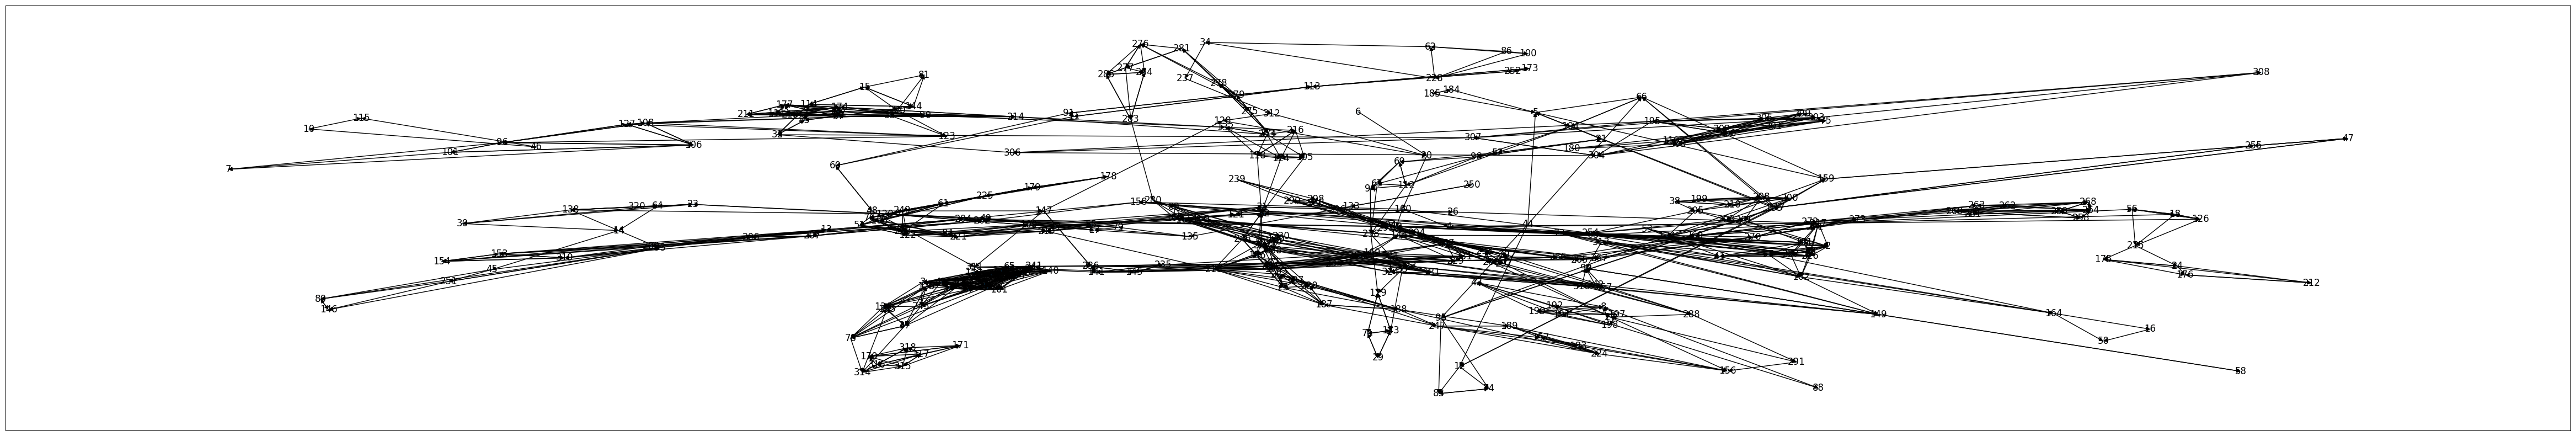

In [5]:
G = nx.DiGraph()
Matrix = pems
MatrixA = Matrix
print(len(Matrix))
plt.figure(figsize=(60, 10))
V=0
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
		if i==j:
			continue
            #continue
		if Matrix[i][j]>0.5:
			G.add_edge(i, j)
			V+=1

print(V)
nx.draw_networkx(G,node_size=0.05,pos=nx.spring_layout(G,iterations = 20))
plt.show()

In [26]:
MatrixA = Matrix
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        if i==j:
            MatrixA[i][j]=0
        elif Matrix[i][j]>0:
            MatrixA[i][j]=1
        else:
            MatrixA[i][j]=0
# for i in range(len(Matrix)):
# 	for j in range(len(Matrix)):
#         if i==j:
#             MatrixA[i][j]=0
#         if Matrix[i][j]>0.5:
#             MatrixA[i][j]=Matrix[i][j]


In [6]:
def create_diag_matrix(matrix_A):

    #Assign sum of elements across each column to the diagonal of a matrix
    matrix_D = np.diag(np.sum(matrix_A, axis = 1))

    #Return diagonal degree matrix
    return(matrix_D)

def create_norm_laplacian(matrix_D, matrix_A):

    #Determine matrix_L based on the value of determinant of matrix_D (check for singular matrix)
    if np.linalg.det(matrix_D) != 0:
        matrix_D_inv = np.linalg.inv(np.sqrt(matrix_D))
    else:
        matrix_D_inv = np.linalg.pinv(np.sqrt(matrix_D)) # Implicit decomposition of singular vector/matrix to find its inverse

    matrix_L = np.dot(np.dot(matrix_D_inv, matrix_A), matrix_D_inv)

    return(matrix_L)

#Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L
def extract_eigen_values(matrix_L, max_value_nodes):

    #Calculate eigenvalues and eigenvectors of normalized laplacian matrix
    eigen_values, eigen_vectors = scipy.linalg.eigh(matrix_L)

    #Plot distribution of eigenvalues
    plt.figure(figsize = (15, 7))
    plt.scatter(range(1, max_value_nodes + 1), eigen_values)
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvalues')
    plt.title('Eigenvalues Distribution')
    plt.show()

    return(eigen_values, eigen_vectors)

#Execute K-means algorithm, and save it's result on label to visual clusters
def kmeans(Adj_matrix,eigen_values, matrix_L):

    #Determine optimal value for number of clusters, k
    k = np.argmin(np.ediff1d(np.flipud(eigen_values))) + 1

    print('\tOptimal value of k is {0}'.format(k))

    #K-means execution
    kmeans = KMeans(n_clusters = k, random_state = 1234).fit(matrix_L)

    #Store the cluster label(s)
    cluster_labels = kmeans.labels_
    print(cluster_labels)

    #Plot clusters
    plot_graph(Matrix=Adj_matrix, size_of_node=20, k_val=k, num_of_iter=30, cluster_labels=cluster_labels)

#Carry out Spectral Clustering algorithm
def spectral_clustering(X, L, max_value_nodes):

    #Extract eigenvector corresponding to second smallest eigenvalue of matrix L, also known as fiedler vector
    fiedler_vector = X[:, 1]

    #Plot the sparsity pattern and sorted fiedler vector
    fig = plt.figure(figsize = (25, 10), dpi= 300, facecolor = 'w', edgecolor = 'k')

    #Plot normalized laplacian matrix values to determine the sparsity pattern in the clusters
    plt.subplot(1, 2, 1)
    plt.spy(L)
    plt.title('Sparsity Pattern')

    #Plot fiedler vector values to identify possible clusters
    plt.subplot(1, 2, 2)
    plt.scatter(range(1, max_value_nodes + 1), np.sort(fiedler_vector))
    plt.xlabel('Nodes')
    plt.ylabel('Fiedler Vector Values')
    plt.title('Fiedler Vector Distribution')

    plt.show()

#Visualize graph
def plot_graph(Matrix, size_of_node, k_val, num_of_iter, cluster_labels = 'b'):

    #Initilize networkx graph object
    G = nx.Graph()
    nodes=range(len(Matrix))
    G.add_nodes_from(nodes)

    for i in range(len(Matrix)):
        for j in range(len(Matrix)):
            if i==j:
                continue
                #continue
            if Matrix[i][j]>0.9:
                G.add_edge(i, j)

    #Plot networkx graph
    nx.draw(G, node_size = size_of_node, pos = nx.spring_layout(G, k = k_val, iterations = num_of_iter), node_color = cluster_labels, with_labels = False)

    plt.show()




Step 5: Creating the Diagonal Degree Matrix D...

Step 6: Creating the Normalized Laplacian Matrix L...

Step 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...


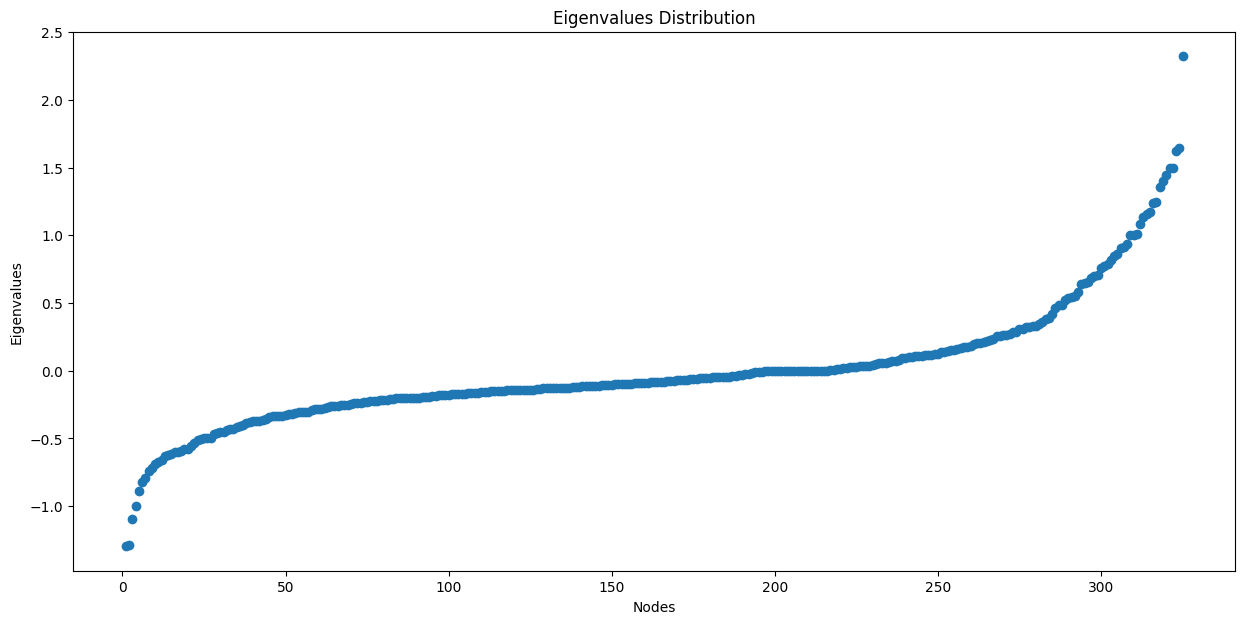


Step 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


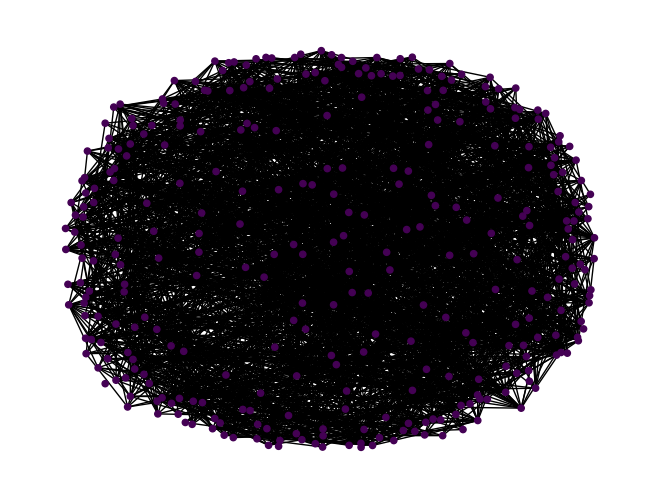

In [27]:
max_value_nodes = 325
matrix_A =MatrixA

print('\nStep 5: Creating the Diagonal Degree Matrix D...')
matrix_D = create_diag_matrix(matrix_A)

print('\nStep 6: Creating the Normalized Laplacian Matrix L...')
matrix_L = create_norm_laplacian(matrix_D, matrix_A)

print('\nStep 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...')
w, X = extract_eigen_values(matrix_L, max_value_nodes)

print('\nStep 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...')
kmeans(MatrixA,w, matrix_L)


In [28]:
# Python program to find strongly connected components in a given
# directed graph using Tarjan's algorithm (single DFS)
#Complexity : O(V+E)

from collections import defaultdict

# This class represents an directed graph
# using adjacency list representation


class Graph:

    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices
        self.res=[]

        # default dictionary to store graph
        self.graph = defaultdict(list)

        self.Time = 0

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)

    '''A recursive function that find finds and prints strongly connected
    components using DFS traversal
    u --> The vertex to be visited next
    disc[] --> Stores discovery times of visited vertices
    low[] -- >> earliest visited vertex (the vertex with minimum
                discovery time) that can be reached from subtree
                rooted with current vertex
     st -- >> To store all the connected ancestors (could be part
           of SCC)
     stackMember[] --> bit/index array for faster check whether
                  a node is in stack
    '''

    def SCCUtil(self, u, low, disc, stackMember, st):

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        stackMember[u] = True
        st.append(u)

        # Go through all vertices adjacent to this
        for v in self.graph[u]:

            # If v is not visited yet, then recur for it
            if disc[v] == -1:

                self.SCCUtil(v, low, disc, stackMember, st)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                # Case 1 (per above discussion on Disc and Low value)
                low[u] = min(low[u], low[v])

            elif stackMember[v] == True:

                '''Update low value of 'u' only if 'v' is still in stack
                (i.e. it's a back edge, not cross edge).
                Case 2 (per above discussion on Disc and Low value) '''
                low[u] = min(low[u], disc[v])

        # head node found, pop the stack and print an SCC
        w = -1  # To store stack extracted vertices
        if low[u] == disc[u]:
            tmp=[]
            while w != u:
                w = st.pop()
                print(w, end=" ")
                tmp.append(w)
                stackMember[w] = False

            print()
            self.res.append(tmp)

    # The function to do DFS traversal.
    # It uses recursive SCCUtil()

    def SCC(self):

        # Mark all the vertices as not visited
        # and Initialize parent and visited,
        # and ap(articulation point) arrays
        disc = [-1] * (self.V)
        low = [-1] * (self.V)
        stackMember = [False] * (self.V)
        st = []

        # Call the recursive helper function
        # to find articulation points
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if disc[i] == -1:
                self.SCCUtil(i, low, disc, stackMember, st)

In [29]:
g1 = Graph(325)
for i in range(len(pems)):
	for j in range(len(pems)):
		if i==j:
			continue
		if pems[i][j]>0.2:
			g1.addEdge(i, j)

print("SSC in first graph ")
g1.SCC()
print("SSC list ")
print(g1.res)
# print("Dict")
print(g1.graph)
print(len(g1.res))
degree = np.zeros(len(g1.res))
for i in range(len(g1.res)):
    degree[i] = len(g1.res[i])
degree = np.asarray(degree)
print(degree)
print((degree**-1).shape)

SSC in first graph 
0 
1 
172 70 
58 
149 99 
115 
10 
46 
50 
16 
319 154 153 
209 207 206 204 202 13 
158 
131 
156 
291 
27 
288 
297 294 293 292 289 194 
295 
296 290 286 
298 
239 143 129 71 29 
35 
238 
94 
67 
112 69 
98 52 21 
104 66 
5 
255 47 
159 95 155 83 74 12 
185 184 
310 
268 264 260 259 258 
261 
263 262 
273 272 271 270 269 
265 
267 266 
312 236 235 234 233 196 182 232 231 229 169 230 166 165 150 148 322 323 321 181 168 130 110 167 145 324 257 142 141 244 243 125 317 318 316 315 314 203 190 254 201 313 227 226 151 134 205 171 170 193 78 37 136 88 43 8 191 72 160 20 128 237 164 102 97 41 19 4 2 
116 87 
3 
6 
7 
68 
34 
62 
127 108 106 101 96 
123 
228 
33 
240 
81 
144 114 15 85 32 
306 
308 
307 304 
305 303 302 195 300 
146 80 
224 183 157 
189 
248 
247 
214 213 211 174 137 253 216 124 246 54 218 222 221 220 219 109 188 186 217 121 55 40 105 132 177 212 215 126 56 82 31 84 187 107 25 36 118 90 57 111 176 175 24 18 26 9 
311 
147 
60 48 
252 173 113 91 11 
251 93 


In [17]:
coarse_graph= {}
Afc = np.zeros((len(Matrix),len(g1.res)))
for i,nodes in enumerate(g1.res):
    for j in range(len(nodes)):
        Afc[nodes[j]][i] = 1
for i in range(len(g1.res)):
    coarse_graph[i] = g1.res[i]
np.save('Afc.npy',Afc)
# print(coarse_graph)
# pemsd=np.load('pems-bay/dataset.npy')
print(Afc.shape)
X = np.load('pems-bay/dataset.npy')
print(X[0][172])
print(X[0][70])
print('\n')
print(X[1][172])
print(X[1][70])
print('\n')
print(X[2][172])
print(X[2][70])
print('\n')
print(X[3][172])
print(X[3][70])
print('\n')
print(X[4][172])
print(X[4][70])
print('\n')
print(X[5][172])
print(X[5][70])
print('\n')
print(X[6][172])
print(X[6][70])
print('\n')
print(X[7][172])
print(X[7][70])
print('\n')
print(X[8][172])
print(X[8][70])
print('\n')
print(X[9][172])
print(X[9][70])
print('\n')
X = X.transpose((1, 2, 0))
X = X.astype(np.float32)
# means = np.mean(X, axis=(0, 2))
# print(means.shape)
# X = X - means.reshape(1, -1, 1)
# stds = np.std(X, axis=(0, 2))
# X = X / stds.reshape(1, -1, 1)

print(Afc.sum(axis=0).shape)
Afc = Afc/Afc.sum(axis=0)
print(np.unique(Afc))
afc = Afc.T
X = X.reshape(325,-1)
print(afc.shape)
print(X.shape)
pemsd = np.dot(afc,X)
# pemsd = degree**-1*pemsd
print(pemsd.shape)
pemsd = pemsd.reshape(137,2,-1)
print(pemsd[2][0][0])
print(pemsd.shape)
pemsd = pemsd.transpose(2,0,1)
print('pemsd.shape is {}'.format(pemsd.shape))
print(pemsd[0][2])
np.save('Afc1.npy',Afc)
np.save('pemsd_norm.npy',pemsd)
adj_mx_t= Afc.T @ pems @ Afc
for i in range(len(adj_mx_t)):
    adj_mx_t[i][i]=1
print('new shape of adj_mx is {}'.format(adj_mx_t.shape))
print(adj_mx_t)
np.save('adj_mx_t.npy',adj_mx_t)
# pems = pems.transpose((2, 0, 1))
# print(pemsd.shape)

# for i,interval in enumerate(pemsd):
#     step = (np.matrix(Afc).T)*interval
#     tmp.append(step)
# res = np.asarray(tmp)
# print(f'res.shape is '+str(res[:,:,0].shape))
# print(f'res.shape is '+str(res[:,:,1].shape))

# for i in range(len(res[-1].shape)):
# # res[:,:,0]=res[:,:,0]/degree
# # res[:,:,1]=res[:,:,1]/degree
#     res[:,:,i]=res[:,:,i]/degree
# print(res[0][2])
# for i in res:
#     i=i/degree


(325, 137)
[69.9  0. ]
[67.7  0. ]


[6.99000000e+01 3.47222222e-03]
[6.76000000e+01 3.47222222e-03]


[7.01000000e+01 6.94444444e-03]
[6.78000000e+01 6.94444444e-03]


[7.02000000e+01 1.04166667e-02]
[6.73000000e+01 1.04166667e-02]


[6.92000000e+01 1.38888889e-02]
[6.80000000e+01 1.38888889e-02]


[6.96000000e+01 1.73611111e-02]
[6.74000000e+01 1.73611111e-02]


[7.06000000e+01 2.08333333e-02]
[6.73000000e+01 2.08333333e-02]


[6.96000000e+01 2.43055556e-02]
[6.75000000e+01 2.43055556e-02]


[6.94000000e+01 2.77777778e-02]
[6.72000000e+01 2.77777778e-02]


[7.040e+01 3.125e-02]
[6.690e+01 3.125e-02]


(137,)
[0.         0.02173913 0.02439024 0.16666667 0.2        0.25
 0.33333333 0.5        1.        ]
(137, 325)
(325, 104232)
(137, 104232)
68.79999923706055
(137, 2, 52116)
pemsd.shape is (52116, 137, 2)
[68.79999924  0.        ]
new shape of adj_mx is (137, 137)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0.

In [18]:

g2 = Graph(137)
adj_mx1 = np.identity(137)
for i in range(len(coarse_graph)):
    # select node i in coarse_graph
    # Use the value to
    # check if nodes are connected in fine-grained graph
    # if connected,then the coarse-nodes they belong to should be connected
    for j in range(len(coarse_graph[i])):
        key =coarse_graph[i][j]
        nodes = g1.graph[key]
        for node in nodes:
            for index,nodeList in enumerate(g1.res):
                if node in nodeList and index!=i:
                    g2.addEdge(i, index)
                    adj_mx1[i,index]=1

np.save('adj_mx1.npy',adj_mx1)
for k,v in g2.graph.items():
    g2.graph[k]=list(set(v))
print(g2.graph)

defaultdict(<class 'list'>, {3: [2], 4: [3], 6: [5], 7: [5, 6], 8: [6, 7], 9: [8, 7], 11: [10], 12: [11], 13: [3, 4], 14: [8, 9, 4, 13], 15: [13, 14], 16: [14, 15], 17: [16, 14, 15], 18: [16, 17, 14, 15], 19: [14, 15, 16, 17, 18], 20: [15, 16, 17, 18, 19], 21: [15, 16, 17, 18, 19, 20], 23: [22], 24: [22, 23], 25: [24, 22, 23], 26: [25], 27: [25, 26], 28: [18, 19, 20, 21, 25, 26, 27], 29: [19, 20, 21, 25, 26, 27, 28], 30: [20, 21, 26, 27, 28, 29], 31: [21, 26, 27, 28, 29, 30], 32: [26, 27, 28, 29, 30, 31], 33: [32, 27, 28, 29, 30, 31], 34: [32, 33, 28, 29, 30, 31], 35: [32, 33, 34, 3, 4, 8, 9, 11, 12, 14, 30, 31], 36: [35], 37: [35, 36], 39: [38], 40: [38, 39], 41: [40, 38, 39], 42: [40, 41, 38, 39], 43: [41, 42], 44: [41, 42, 43], 45: [42, 43, 44], 46: [42, 43, 44, 45], 47: [46], 48: [46, 47], 49: [48, 46, 47], 50: [48, 49, 47], 51: [48, 49, 50], 52: [48, 49, 50, 51], 53: [51, 52], 54: [52, 53], 55: [35], 57: [38], 59: [57, 38], 60: [57, 59, 38], 62: [11, 35, 12], 63: [35, 12, 57, 58, 

In [19]:
print("SSC in first graph ")
g2.SCC()
print("SSC list ")
print(g2.res)
# print("Dict")
print(g2.graph)
print(len(g2.res))

SSC in first graph 
0 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
SSC list 
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [6

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Step 5: Creating the Diagonal Degree Matrix D...

Step 6: Creating the Normalized Laplacian Matrix L...

Step 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...


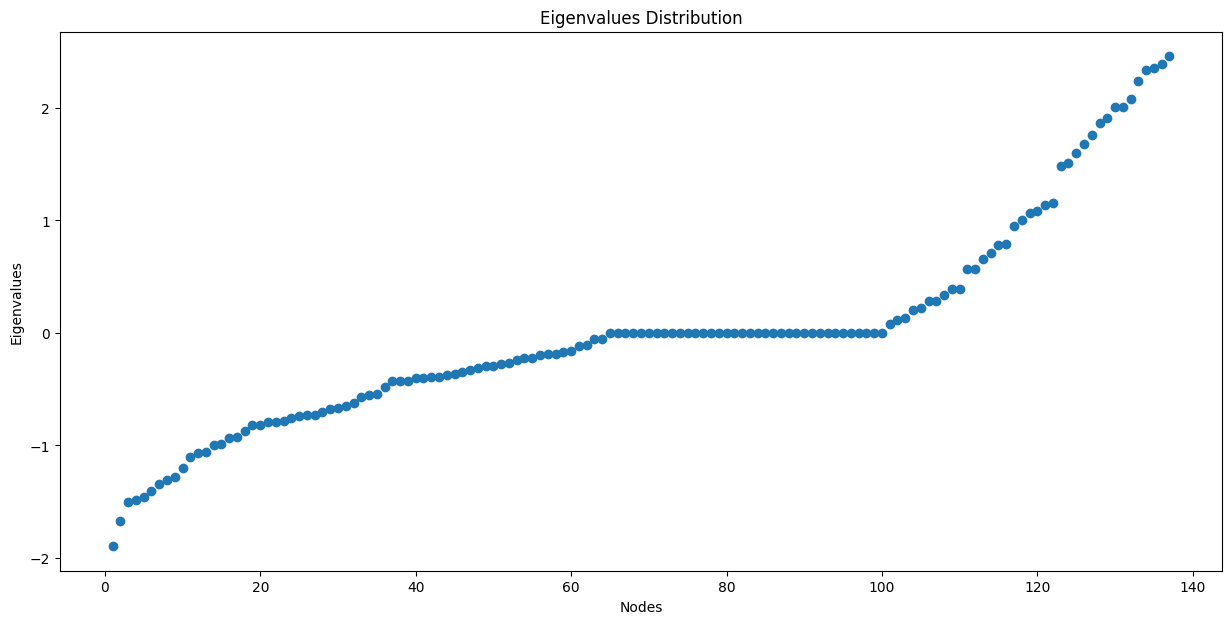


Step 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 15
[ 1  1  1  1  1  1  1  1  1 10  1  1  1  8  8  1  0  0  0  0  0  0  1  1
  1  1 12 12 13 13 13 13  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  3  3  3  1  1  7  1  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1
  1  1  1 10  1 11 10  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  2  1
  9  9  9  9  4 14 14 14 14  1  7  1  1  1  1  8  1  5  1  1  1  1  7  2
  5  1  9  9  1  2  7  1  1  1  1  1  6  6  1  1  2]


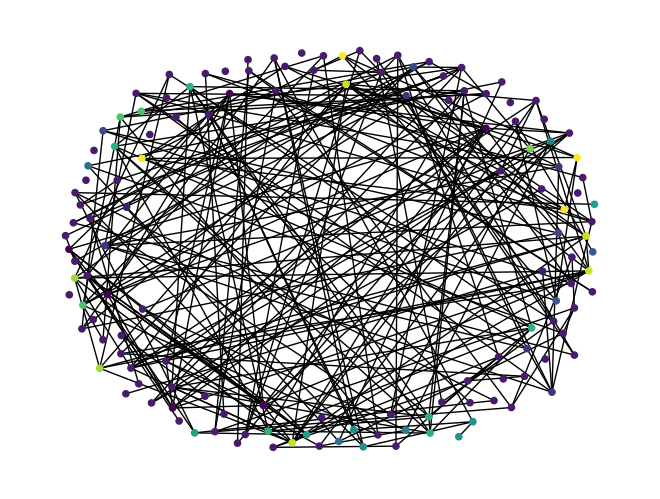

In [25]:
data = np.load('adj_mx_t.npy')

max_value_nodes = 137
matrix = data
matrixA = matrix
print(data)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i==j:
            matrixA[i][j]=0
        elif data[i][j]>0.3:
            matrixA[i][j]=1
        else:
            matrixA[i][j]=0

matrix_A=matrixA
print('\nStep 5: Creating the Diagonal Degree Matrix D...')
matrix_D = create_diag_matrix(matrix_A)

print('\nStep 6: Creating the Normalized Laplacian Matrix L...')
matrix_L = create_norm_laplacian(matrix_D, matrix_A)

print('\nStep 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...')
w, X = extract_eigen_values(matrix_L, max_value_nodes)

print('\nStep 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...')
kmeans(data,w, matrix_L)
